# 0.1 - Setup

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Setting matplotlib to display w/in notebook

%matplotlib inline

In [3]:
# Defining File path
path = r'/Users/joefeuille/CF Analysis/Spotify Analysis'

In [4]:
# Importing master data set
master = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'global_master.pkl'))

# 0.2 - Data Check

In [5]:
master.shape

(15722, 29)

In [6]:
master.head()

,Position,Track Name,Artist,Streams,URL,Week,Country,Country_Code,Track ID,Album,...,Speechiness,Tempo,Time_Signature,Key,Mode,Valence,Duration,Explicit,Markets,_merge
0,1,STAY (with Justin Bieber),The Kid LAROI,2031338.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/30/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
1,1,STAY (with Justin Bieber),The Kid LAROI,2260974.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/23/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
2,1,STAY (with Justin Bieber),The Kid LAROI,2277839.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/16/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
3,1,STAY (with Justin Bieber),The Kid LAROI,2367836.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/09/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
4,1,STAY (with Justin Bieber),The Kid LAROI,2535418.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/02/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both


In [7]:
master.dtypes

Position               int64
Track Name            object
Artist                object
Streams              float64
URL                   object
Week                  object
Country               object
Country_Code          object
Track ID              object
Album                 object
Release_date          object
Length               float64
Popularity           float64
Acousticness         float64
Danceability         float64
Energy               float64
Instrumentalness     float64
Liveness             float64
Loudness             float64
Speechiness          float64
Tempo                float64
Time_Signature       float64
Key                    int64
Mode                   int64
Valence              float64
Duration               int64
Explicit                bool
Markets               object
_merge              category
dtype: object

In [9]:
# Checking for missing values

master.isnull().sum()

Position            0
Track Name          0
Artist              0
Streams             0
URL                 0
Week                0
Country             0
Country_Code        0
Track ID            0
Album               0
Release_date        0
Length              0
Popularity          0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Time_Signature      0
Key                 0
Mode                0
Valence             0
Duration            0
Explicit            0
Markets             0
_merge              0
dtype: int64

# Q.4 - Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

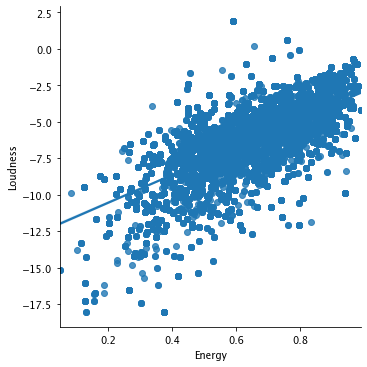

In [12]:
# Create a scatterplot for Energy/Loudness for the Global set

erg_v_loud = sns.lmplot(x = 'Energy', y = 'Loudness', data = master)

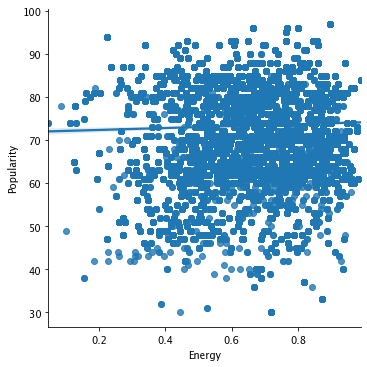

In [13]:
# Create a scatterplot for Energy/Popularity for the Global set

erg_v_pop = sns.lmplot(x = 'Energy', y = 'Popularity', data = master)

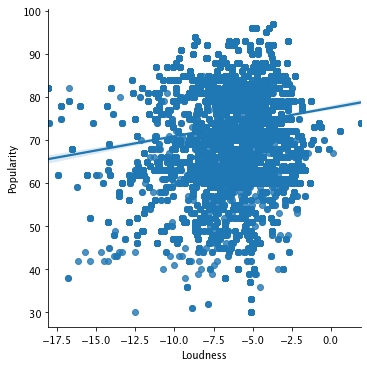

In [14]:
# Create a scatterplot for Loudness/Popularity for the Global set

loud_v_pop = sns.lmplot(x = 'Loudness', y = 'Popularity', data = master)

#### The most interesting relationship worth examining is Energy/Loudness. As Energy/Popularity is mostly flat, it doesn't seem like a worthwhile analysis. We'll add Loudness/Popularity to the Linear Regression for practice & curiosity's sake.

# Q.5 - State your hypothesis.

### Hypothesis #1: The higher a song's energy rating, the more likely it is to be loud.

### Hypothesis #2: The louder a song is, the more popular it will be.

# Q.6 - Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [15]:
# Reshaping variables into Numpy arrays

X_1 = master['Energy'].values.reshape(-1,1)
y_1 = master['Loudness'].values.reshape(-1,1)

X_2 = master['Loudness'].values.reshape(-1,1)
y_2 = master['Popularity'].values.reshape(-1,1)

In [16]:
X_1

array([[0.764],
       [0.764],
       [0.764],
       ...,
       [0.821],
       [0.692],
       [0.479]])

In [17]:
y_1

array([[ -5.484],
       [ -5.484],
       [ -5.484],
       ...,
       [ -4.085],
       [ -5.431],
       [-10.646]])

In [18]:
X_2

array([[ -5.484],
       [ -5.484],
       [ -5.484],
       ...,
       [ -4.085],
       [ -5.431],
       [-10.646]])

In [19]:
y_2

array([[93.],
       [93.],
       [93.],
       ...,
       [71.],
       [74.],
       [79.]])

# Q.7 - Split the data into two sets: a training set and a test set.

In [20]:
# Splitting data into training/test sets for Hypothesis #1

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [21]:
# Splitting data into training/test sets for Hypothesis #2

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

# Q.8 - Run a linear regression on the data.

###    First, fit the model you created to the training set.
###    Then, create a prediction for y on the test set.


In [22]:
# Creating regression objects.

regression_1 = LinearRegression()
regression_2 = LinearRegression()

In [24]:
# Fitting the regression objects onto training sets.

regression_1.fit(X_1_train, y_1_train)
regression_2.fit(X_2_train, y_2_train)

LinearRegression()

In [25]:
# Predicting the values of y's for both hypotheses

y_1_predicted = regression_1.predict(X_1_test)
y_2_predicted = regression_2.predict(X_2_test)

# Q.9 - Create a plot that shows the regression line on the test set.

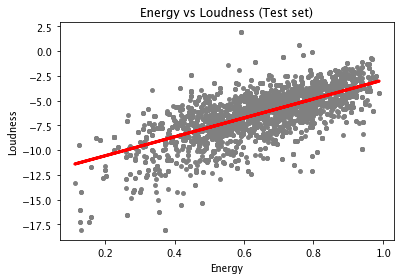

In [26]:
# Creating plot of first regression's model

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('Energy vs Loudness (Test set)')
plot_test_1.xlabel('Energy')
plot_test_1.ylabel('Loudness')
plot_test_1.show()

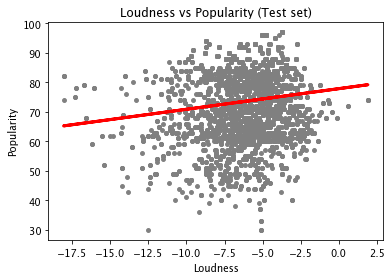

In [27]:
# Creating plot of second regression's model

plot_test_2 = plt
plot_test_2.scatter(X_2_test, y_2_test, color='gray', s = 15)
plot_test_2.plot(X_2_test, y_2_predicted, color='red', linewidth =3)
plot_test_2.title('Loudness vs Popularity (Test set)')
plot_test_2.xlabel('Loudness')
plot_test_2.ylabel('Popularity')
plot_test_2.show()

# Q.10 - Create a plot that shows the regression line on the test set.

### Regression #1: The prediction line seems to follow the data points well. However, there are more than a few points that fall far from the line. I expect the R2 value to be 0.5 or less.

### Regression #2: The prediction line doesn't even seem to cut through the middle of the cluster. I didn't expect this second regression to create a stellar prediction, but I wanted to get some extra practice. I expect the R2 value to be less than 0.3.

# Q.11 - Check the model performance statistics—MSE and R2.

In [28]:
# Creating objects for the summary statistics.

rmse_1 = mean_squared_error(y_1_test, y_1_predicted)
r2_1 = r2_score(y_1_test, y_1_predicted)

rmse_2 = mean_squared_error(y_2_test, y_2_predicted)
r2_2 = r2_score(y_2_test, y_2_predicted)

In [29]:
# Printing the model summary statistics for Hypothesis 1. 

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[9.56689553]]
Mean squared error:  3.1115089890388354
R2 score:  0.4551742080946515


In [30]:
# Printing the model summary statistics for Hypothesis 2. 

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.69887406]]
Mean squared error:  154.48275243866377
R2 score:  0.009739428915909731


# Q.12 - Compare the predicted y values with the actual y values in a dataframe.

In [31]:
y_1_predicted

array([[-7.67698682],
       [-7.58131787],
       [-4.99825608],
       ...,
       [-4.82605196],
       [-5.31396363],
       [-4.9408547 ]])

In [32]:
y_2_predicted

array([[73.18092113],
       [74.5961411 ],
       [73.68271271],
       ...,
       [74.4319057 ],
       [74.20337388],
       [75.01336891]])

In [34]:
# Creating a dataframe for Hypothesis 1 comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual_1': y_1_test.flatten(), 'Predicted_1': y_1_predicted.flatten()})
data_1.head(30)

,Actual_1,Predicted_1
0,-6.725,-7.676987
1,-4.700,-7.581318
2,-6.007,-4.998256
3,-6.312,-4.854753
4,-4.550,-5.122626
5,-4.858,-6.988170
6,-5.680,-5.658372
7,-6.403,-5.093925
8,-6.184,-8.021395
9,-5.187,-7.801356


In [35]:
# Creating a dataframe for Hypothesis 2 comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual_2': y_2_test.flatten(), 'Predicted_2': y_2_predicted.flatten()})
data_2.head(30)

,Actual_2,Predicted_2
0,88.0,73.180921
1,73.0,74.596141
2,55.0,73.682713
3,92.0,73.469556
4,46.0,74.700972
5,83.0,74.485719
6,80.0,73.911245
7,45.0,73.405959
8,83.0,73.559012
9,92.0,74.255789


# Q.12 - Include your thoughts on how well the model performed on the test set in a markdown cell.

### Hypothesis #1: At first blush, the MSE value of 3.1115 seems fairly good, except when you recall that Loudness is measurement of decibels, which are a logarithmic scale. Meaning that an increase of 3 dbs is actually 100 more powerful. Context is key.

### Hypothesis #2: The linear regression for Loudness/Popularity really isn't worth its salt. An MSE of 154 is awful, especially when you consider that Popularity is a measurement of 0 to 100.

## In both cases, a linear regression model doesn't really fit the data set. As we demonstrated in 6.2, few of the values in this data set have a linear relationship. As such, this Supervised Machine Learning isn't going to be terribly insightful. (But I am very excited to look at clustering and unsupervised machine learning in the next lesson.)